<a href="https://colab.research.google.com/github/G-Shillcock/Division_of_Labour/blob/main/DoL_graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def A(t):
    return t**a

def B(t):
    return (1-t)**b

def B_ex(A):
    return (1-A**(1/a))**b

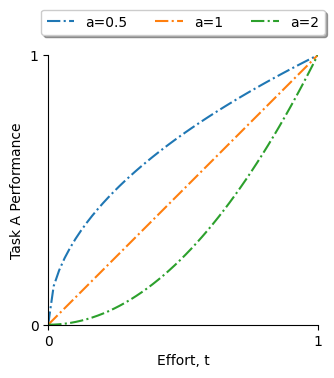

In [24]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3.5))
ax.set_aspect('equal')
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel('Effort, t')
ax.set_ylabel('Task A Performance')
ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xlim([0,1])
ax.set_ylim([0,1])

t = np.linspace(0,1)

for a in [.5, 1, 2]:
    ax.plot(t, A(t),'-.', label=f'a={a}')
    ax.legend(ncol=3, loc='lower center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)

plt.savefig('Performance.svg')

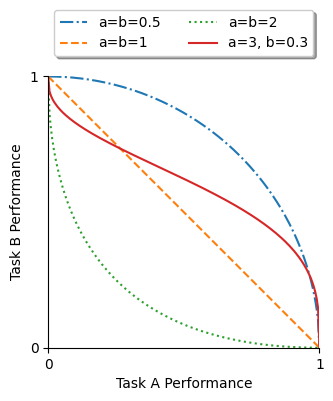

In [25]:
fig = plt.figure(figsize=(3.5,4))
plt.subplots_adjust(top=0.85)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel('Task A Performance')
ax.set_ylabel('Task B Performance')
ax.set_xticks([0,1])
ax.set_yticks([0,1])

ax.set_xlim([0,1])
ax.set_ylim([0,1])

Av = np.linspace(0,1,200)

a,b = (.5,.5)
ax.plot(Av, B_ex(Av), '-.', label=f'a=b={b}')

a,b = (1,1)
ax.plot(Av, B_ex(Av), '--', label=f'a=b={b}')

a,b = (2,2)
ax.plot(Av, B_ex(Av), ':', label=f'a=b={b}')

a,b = 3, .3
ax.plot(Av, B_ex(Av), '-', label=f'a={a}, b={b}')

plt.legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
plt.savefig('TradeOff.svg')

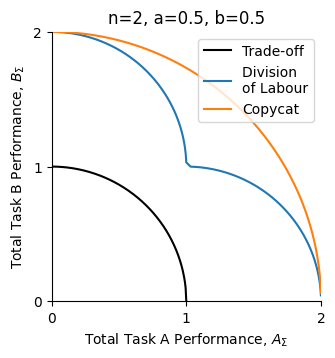

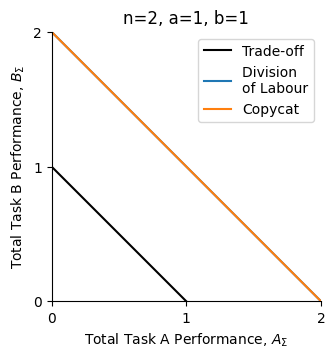

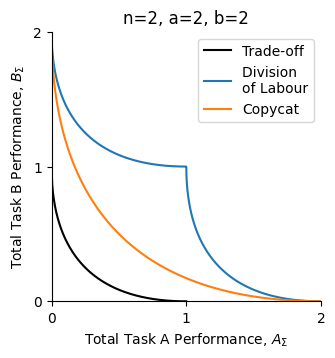

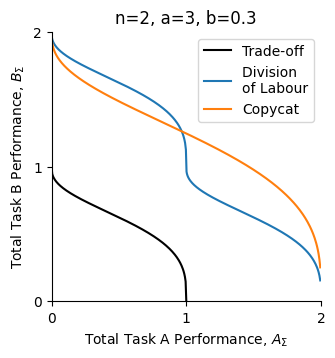

In [26]:
def calc_traj():

    Ax, By = [],[]
    Gx, Gy = [],[]
    Dx, Dy = [],[]

    for t in np.linspace(0,n,1000):

        Ax.append( A(t/n) )
        By.append( B(t/n) )

        Gx.append( n*A(t/n) )
        Gy.append( n*B(t/n) )

        Dx.append( A(t%1) + np.floor(t) )
        Dy.append( B(t%1) - np.ceil(t) + n )

    return Dx[:-1], Dy[:-1], Gx[:-1], Gy[:-1], Ax[:-1], By[:-1]

def plot():

    fig, ax = plt.subplots(figsize=(3.5,3.5))
    ax.set_aspect('equal')
    ax.spines[['right', 'top']].set_visible(False)

    Dx, Dy, Gx, Gy, _, _ = calc_traj()

    plt.title(f'n={n}, a={a}, b={b}')
    ax.set_xlabel(r'Total Task A Performance, $A_\Sigma}$')
    ax.set_ylabel(r'Total Task B Performance, $B_\Sigma}$')
    ax.set_xticks(np.arange(0,n+1))
    ax.set_yticks(np.arange(0,n+1))

    ax.set_xlim([0,n])
    ax.set_ylim([0,n])
    ax.set_xticks(np.arange(0,n+1))
    ax.set_yticks(np.arange(0,n+1))

    # ax_inset = inset_axes(ax, width="40%", height="40%", loc='lower left')
    # ax_inset.set_xlabel('Performance A')
    # ax_inset.set_ylabel('Performance B')

    Av = np.linspace(0,1,200)

    ax.plot(Av,(1-Av**(1/a))**b,'k-', label='Trade-off')

    ax.plot(Dx,Dy, label='Division \nof Labour')
    ax.plot(Gx,Gy, label='Copycat')

    ax.legend(loc='upper right')

    plt.savefig(f'SumSet{a}_{b}_{n}.svg')


n = 2

for a,b in [(.5,.5), (1,1), (2,2), (3, .3)]:
    plot()

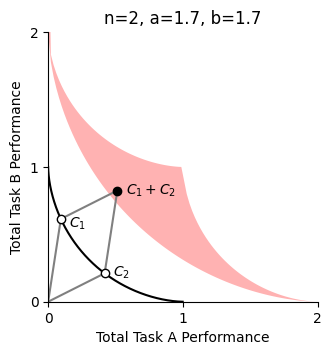

In [21]:
n = 2
a = 1.7
b = a

Dx, Dy, Gx, Gy, Ax, By = calc_traj()

fig = plt.figure(figsize=(3.5,3.5))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.spines[['right', 'top']].set_visible(False)

plt.title(f'n={n}, a={a}, b={b}')
ax.set_xlabel('Total Task A Performance')
ax.set_ylabel('Total Task B Performance')
ax.set_xticks(np.arange(0,n+1))
ax.set_yticks(np.arange(0,n+1))

ax.set_xlim([0,n])
ax.set_ylim([0,n])

ax.plot(Ax,By, 'k')

A1 = Ax[len(Ax)//4]
B1 = By[len(By)//4]

A2 = Ax[3*len(Ax)//5]
B2 = By[3*len(By)//5]

plt.plot([0, A1], [0, B1], color='0.5')
plt.plot([0, A2], [0, B2], color='0.5')

plt.annotate('$C_1$', (A1, B1),textcoords='offset points', xytext=(6,-6))
plt.annotate('$C_2$', (A2, B2),textcoords='offset points', xytext=(6,-2))
plt.annotate('$C_1+C_2$', (A1+A2, B1+B2), textcoords='offset points', xytext=(6,-3))


plt.plot([A1, A1+A2], [B1, B1+B2], color='0.5')
plt.plot([A2, A1+A2], [B2, B1+B2], color='0.5')

ax.plot(A1,B1,'o', markerfacecolor='white', markeredgecolor='black')
ax.plot(A2,B2,'o', markerfacecolor='white', markeredgecolor='black')
ax.plot(A1+A2,B1+B2,'o', markerfacecolor='black', markeredgecolor='black')


x_fill = np.linspace(min(min(Dx), min(Gx)), max(max(Dx), max(Gx)), 100)
plt.fill_between(x_fill,
                 np.interp(x_fill, Dx, Dy),
                 np.interp(x_fill, Gx, Gy),
                 color='red', alpha=0.3,
                 edgecolor='none')

plt.savefig('setsum_diagram.svg')

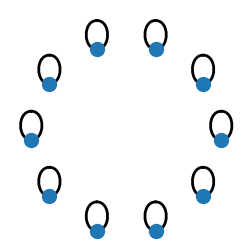

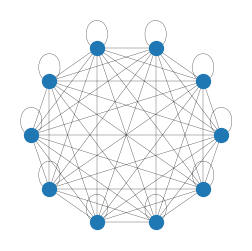

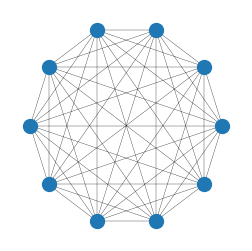

In [ ]:
import networkx as nx

def draw(λ):
    n = 10

    adj = (λ*np.ones(n) + (1-2*λ)*np.eye(n))/(n*(n*λ-2*λ+1))

    G = nx.Graph(adj)
    layout = nx.circular_layout(G, scale=.5)

    plt.figure(figsize=(3,3))
    plt.axis('off')

    for edge in G.edges(data=True):
        alpha = 1 # n*edge[2]['weight']
        width = 2*n*edge[2]['weight']
        nx.draw_networkx_edges(G, layout, edgelist=[(edge[0], edge[1])], alpha=alpha, width=width)

    nx.draw_networkx_nodes(G, layout, node_size=100)

    plt.savefig(f'graph{λ}.svg')
    plt.show()

for λ in np.linspace(0, 1, 3):
    draw(λ)

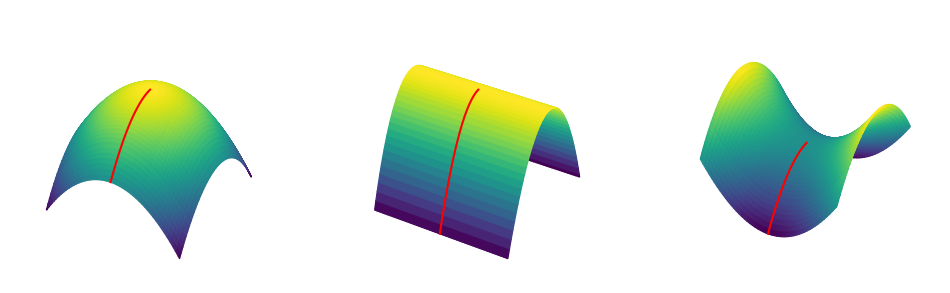

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function for a saddle point
def saddle_point(x, y, c):
    return (x-1)**2 - (y-1)**2 - c*(x-1)**2

x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(1,3,subplot_kw={'projection':'3d'}, figsize=(12,8))

c = 2
for ax in axes:
    ax.view_init(elev=35, azim=-60)
    surf = ax.plot_surface(x, y, saddle_point(x, y, c), shade=False, cmap='viridis')
    surf.set_edgecolors(surf.to_rgba(surf._A))
    surf.set_facecolors("white")

    x_line = np.ones_like(y)[:len(y)//2, 0]
    ax.plot(x_line, y[:len(y)//2, 0], saddle_point(x_line, y[:len(y)//2, 0], c), color='red',zorder=4)
    ax.axis('off')
    c -= 1


<ipython-input-1-71f511e2f7f9>:57: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(a_values[frame], b_values[frame])  # Update the point's position


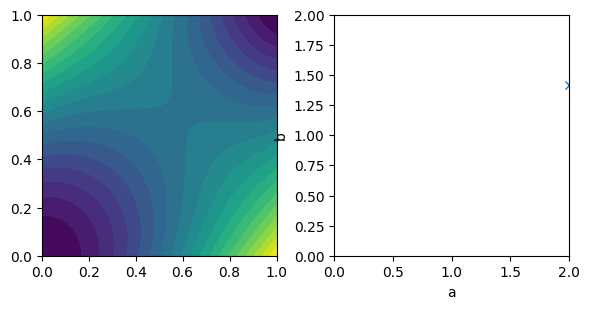

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def performance(effort, task_difficulty):
    return effort ** task_difficulty

def fitness(x, a, b, λ):
    t1, t2 = x
    A1 = performance(t1, a)
    A2 = performance(t2, a)
    B1 = performance(1 - t1, b)
    B2 = performance(1 - t2, b)
    return (1 - λ) * (A1 * B1 + A2 * B2) + λ * (A1 * B2 + A2 * B1)

# Define parameter values
a_values = np.linspace(0.1, 2, 40)  # Values of 'a' for animation
b_values = np.sqrt(np.linspace(0.1, 2, len(a_values)))
λ = 0.5

# Create a meshgrid for t1 and t2
t1_range = np.linspace(0, 1, 100)
t2_range = np.linspace(0, 1, 100)
t1_grid, t2_grid = np.meshgrid(t1_range, t2_range)

# Create a figure and axis
fig, ax = plt.subplots(1,2,figsize = (6,3))

# plt.subplots_adjust(wspace=0.4)  # Adjust the value as needed
plt.tight_layout()

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_xlabel('t1')
ax[0].set_ylabel('t2')

ax[1].set_xlim(0,2)
ax[1].set_ylim(0,2)
ax[1].set_xlabel('a')
ax[1].set_ylabel('b')

# Initialize an empty contour plot
contour = ax[0].contourf(t1_grid, t2_grid, fitness([t1_grid, t2_grid], a_values[0], b_values[0], λ), levels=20)
point, = ax[1].plot([], [], 'x')  # Create an empty point plot

# Function to initialize the point plot
def init():
    point.set_data([], [])
    return point,

# Function to update the contour plot and point in each animation frame
def update(frame):
    ax[0].clear()
    contour = ax[0].contourf(t1_grid, t2_grid, fitness([t1_grid, t2_grid], a_values[frame], b_values[frame], λ), levels=20)
    # ax[0].set_title(f'a = {a_values[frame]:.2f}, b = {b_values[frame]:.2f}')

    point.set_data(a_values[frame], b_values[frame])  # Update the point's position
    return point,

# Create the animation
animation = FuncAnimation(fig, update, init_func=init, frames=len(a_values), interval=500, repeat=True)

# Save the animation as a GIF
animation.save('fitness_animation.gif', writer='pillow')

# Display the animation
plt.show()